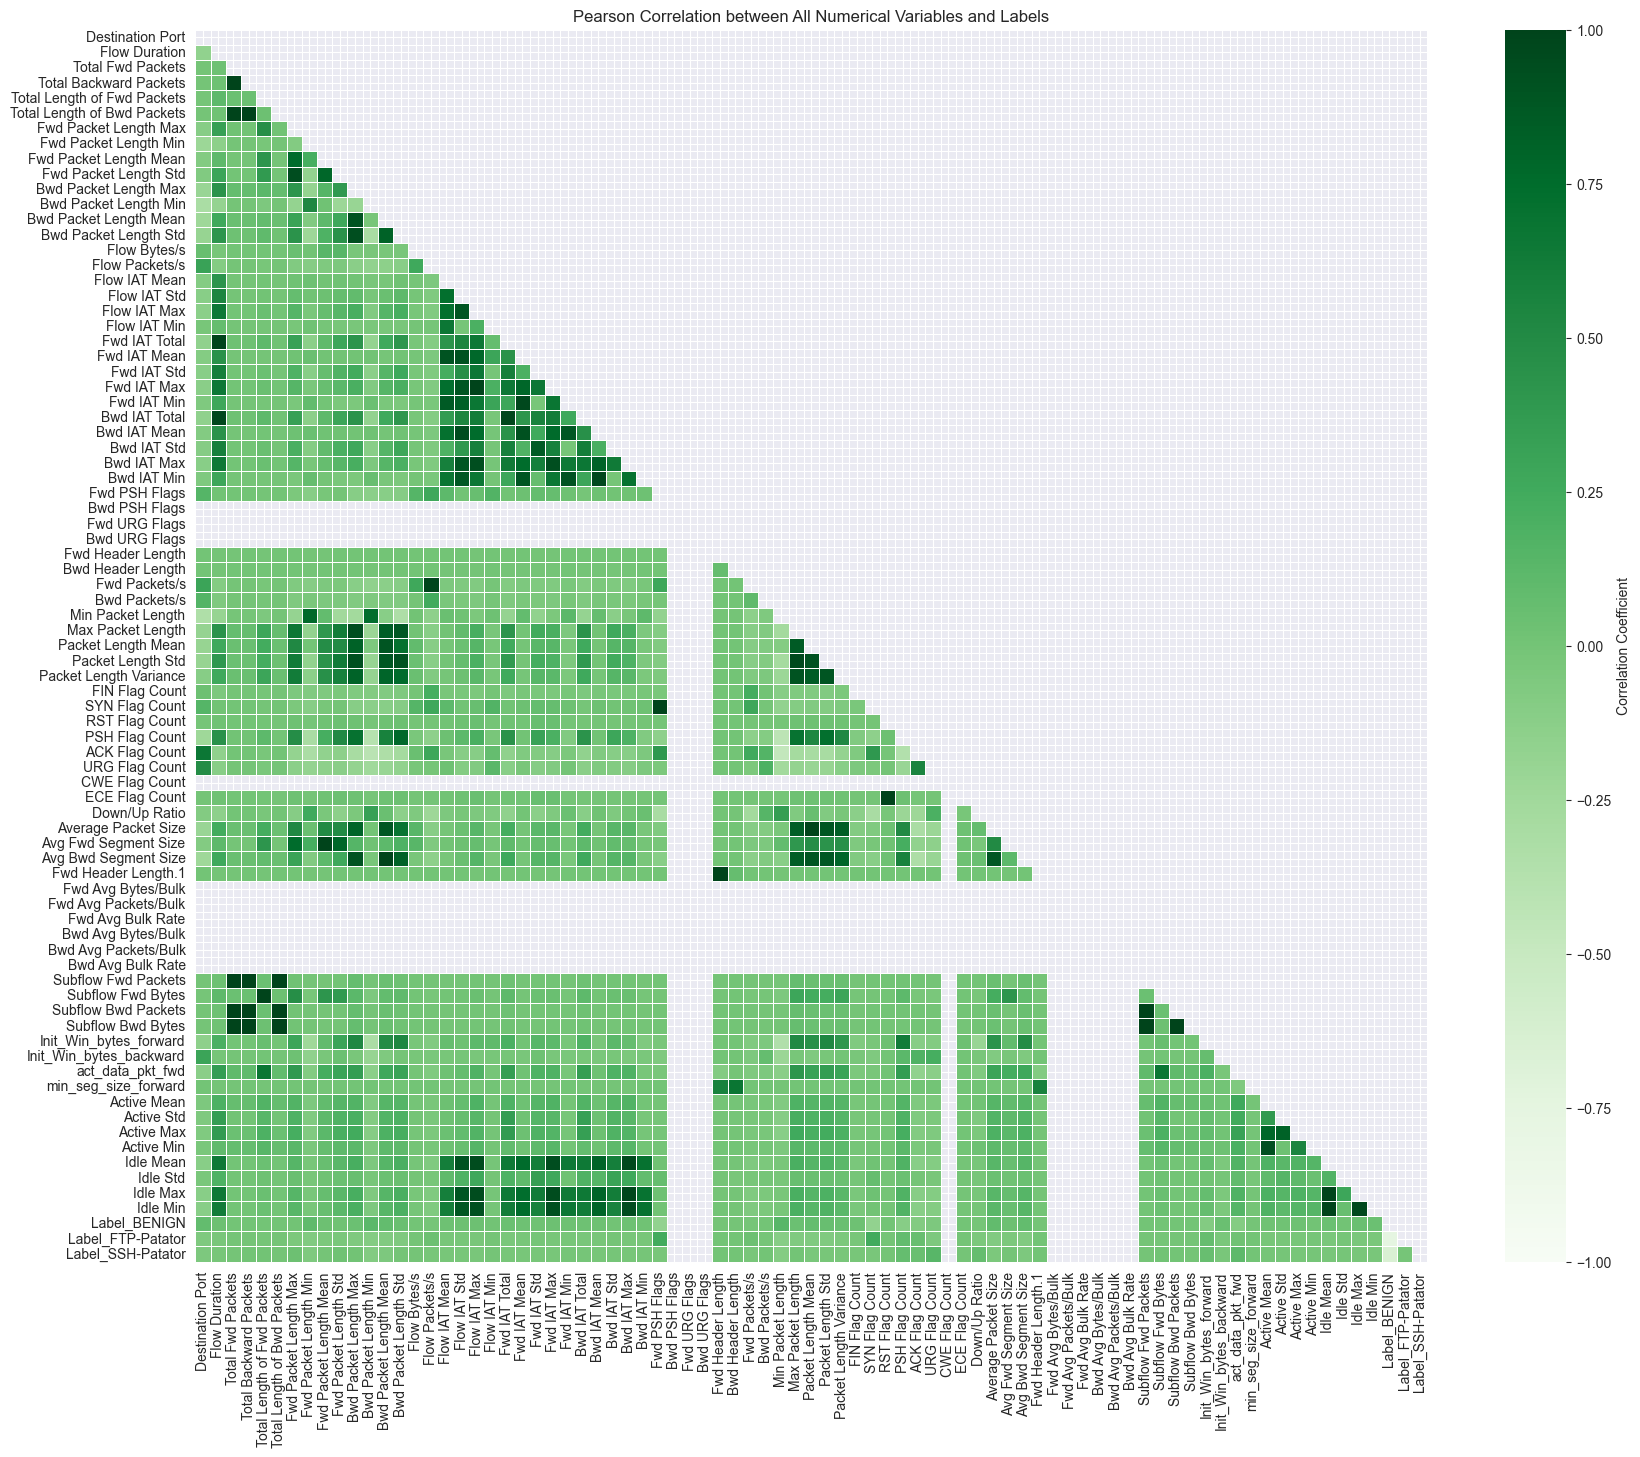

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

np.random.seed(42)

# Load dataset
file_path = 'data/Tuesday-WorkingHours.pcap_ISCX.csv'  # Update path as needed
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()  # Remove whitespace from column names

# Select all numerical columns (excluding 'Label' for now)
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

# One-hot encode the 'Label' column
ohe = OneHotEncoder(sparse_output=False)
encoded_labels = ohe.fit_transform(df[['Label']])
encoded_df = pd.DataFrame(encoded_labels, columns=ohe.get_feature_names_out(['Label']))

# Combine numerical columns and one-hot encoded labels
combined_df = pd.concat([df[numerical_columns], encoded_df], axis=1)

# Compute correlation matrix for all combined columns
corr_matrix = combined_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure (larger size for many columns)
plt.figure(figsize=(20, 16))

# Draw the heatmap with the correlation matrix
sns.heatmap(corr_matrix,
            mask=mask,
            annot=False,  # Disable annotations due to many columns
            cmap='Greens',  # Color scheme
            fmt='.2f',  # Format for annotations (if enabled)
            vmin=-1, vmax=1,  # Range for correlation values
            center=0,  # Center point of colormap
            square=True,  # Make cells square
            linewidths=0.5,  # Lines between cells
            cbar_kws={'label': 'Correlation Coefficient'})  # Colorbar label

# Add title
plt.title('Pearson Correlation between All Numerical Variables and Labels')

# Show the plot
plt.show()

In [21]:
## Automatic - Disabled for future
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path: str = 'data/Wednesday-WorkingHours.pcap_ISCX.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
# Filter for BENIGN and Brute Force attacks (FTP-Patator, SSH-Patator)
brute_force_labels = ['FTP-Patator', 'SSH-Patator']
df = df[df['Label'].isin(['BENIGN'] + brute_force_labels)]

# Map labels: 0 for BENIGN, 1 for Brute Force
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

selected_features = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packet Length Max']
df.fillna(0)
X = df[selected_features]
y = df['Label'].to_numpy()
selector = SelectKBest(score_func=mutual_info_classif, k=4)
X_selected = selector.fit_transform(X, y)
selected_feature_names = X.columns[selector.get_support()].tolist()
print("Selected features:", selected_feature_names)

Selected features: ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packet Length Max']


Feature Map Circuit:


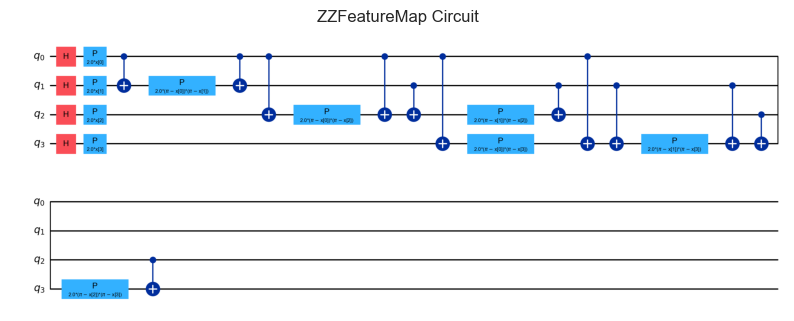

Ansatz Circuit:


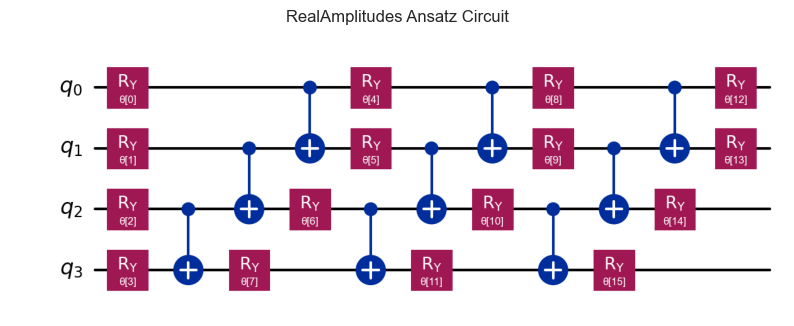

In [1]:
import dill
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit

# Load VQC model
with open('vqc_model.dill', 'rb') as f:
    vqc = dill.load(f)

# Extract feature map and ansatz
feature_map = vqc.feature_map
ansatz = vqc.ansatz

# Visualize feature map
print("Feature Map Circuit:")
feature_map.decompose().draw(output='mpl', filename='feature_map.png')
plt.figure(figsize=(10, 6))
plt.title("ZZFeatureMap Circuit")
plt.imshow(plt.imread('feature_map.png'))
plt.axis('off')
plt.show()

# Visualize ansatz
print("Ansatz Circuit:")
ansatz.decompose().draw(output='mpl', filename='ansatz.png')
plt.figure(figsize=(10, 6))
plt.title("RealAmplitudes Ansatz Circuit")
plt.imshow(plt.imread('ansatz.png'))
plt.axis('off')
plt.show()